# Распределение степеней узлов

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 2: Модели"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.in_degree.html
    * https://networkx.org/documentation/stable/reference/classes/generated/networkx.DiGraph.out_degree.html
* Дополнительные источники:
    * https://www.scaler.com/topics/matplotlib/logarithmic-scale-matplotlib/
* Датасеты с сетями:
    * http://networkrepository.com

## Вопросы для совместного обсуждения

1\. Обсудите различные подходы к вычислению степеней узлов графа.

In [ ]:
import networkx as nx

In [ ]:
G = nx.empty_graph() # G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3)])

In [ ]:
G.nodes

NodeView((0, 1, 2, 3))

In [ ]:
G.degree

DegreeView({0: 1, 1: 2, 2: 2, 3: 1})

In [ ]:
G.degree()

DegreeView({0: 1, 1: 2, 2: 2, 3: 1})

In [ ]:
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]])

In [ ]:
A.sum(axis=1), A.sum(axis=0)

(array([1, 2, 2, 1]), array([1, 2, 2, 1]))

In [ ]:
G = nx.empty_graph(create_using=nx.DiGraph) # G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3)])

In [ ]:
G.in_degree()

InDegreeView({0: 0, 1: 1, 2: 1, 3: 1})

In [ ]:
G.out_degree()

OutDegreeView({0: 1, 1: 1, 2: 1, 3: 0})

In [ ]:
G.degree()

DiDegreeView({0: 1, 1: 2, 2: 2, 3: 1})

In [ ]:
A = nx.adjacency_matrix(G).toarray()
A

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [ ]:
A.sum(axis=1), A.sum(axis=0)

(array([1, 1, 1, 0]), array([0, 1, 1, 1]))

In [ ]:
(A * 5)

array([[0, 5, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 5],
       [0, 0, 0, 0]])

2\. Обсудите использование различных шкал (линейной, логарифмической) для визуализациии графиков.

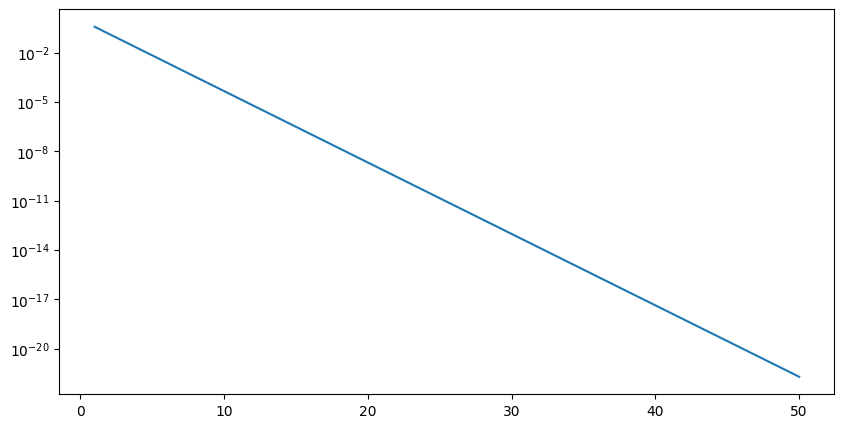

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1, 50, 100)
y = np.exp(-x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y)
# ax.loglog(x, y)
ax.set_yscale("log")

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте неориентированный граф на основе набора данных `fb-pages-food` с сайта https://networkrepository.com/. Добавьте узлам атрибут `name`, который содержит имя человека. Удалите из графа все петли. Получите матрицу смежности графа и посчитайте степень каждого узла на основе этой матрицы. Выведите имя человека, чей узел имеет максимальную степень, и само значение степени.

- [ ] Проверено на семинаре

In [86]:
import networkx as nx
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [246]:
edges_file = '/content/drive/My Drive/fb-pages-food.edges'
node_file = '/content/drive/My Drive/fb-pages-food.nodes'

In [247]:
edges = pd.read_csv(edges_file, delimiter=',', header=None, names=['source', 'target'])
nodes = pd.read_csv(node_file, delimiter=',')

In [248]:
nodes.head()

,id,name,new_id
0,402449106435352,Josh Marks,386
1,368969274888,Blue Ribbon Restaurants,473
2,765596333518863,Pat Neely,1
3,136870209668885,La Griglia,542
4,840078802741859,Jose Garces,189


In [249]:
edges.head()

,source,target
0,0,276
1,0,58
2,0,132
3,0,603
4,0,398


In [250]:
G = nx.Graph()

In [251]:
for _, row in nodes.iterrows():
    G.add_node(row['new_id'], name=row['name'])


for _, row in edges.iterrows():
    G.add_edge(row['source'], row['target'])

In [252]:
G.remove_edges_from(nx.selfloop_edges(G))

In [253]:
adj_matrix = nx.to_numpy_array(G)

In [254]:
adj_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [255]:
degrees = adj_matrix.sum(axis=1)

In [256]:
max(degrees) #максимальная степень

132.0

In [257]:
idx = np.argmax(degrees)

In [258]:
nodes.iloc[idx]['name'] #получение имени из датафрейма

'Logan Junior Chef'

In [259]:
G.nodes[list(G.nodes)[idx]]['name'] #получение имени из графа

'Logan Junior Chef'

<p class="task" id="2"></p>

2\. Используя граф из предыдущего задания, посчитайте степени каждого узла, используя возможности графа `nx.Graph`. Посчитайте и выведите на экран среднюю степень узлов графа, округленную до ближайшего целого.

- [ ] Проверено на семинаре

In [260]:
degrees = dict(G.degree())

In [261]:
avg_d = sum(degrees.values()) / len(degrees)
avg_d

6.745161290322581

In [262]:
round(avg_d)

7

<p class="task" id="3"></p>

3\. Создайте ориентированный граф на основе набора данных `fb-pages-food` с сайта https://networkrepository.com/. Удалите из графа все петли. Получите матрицу смежности графа и посчитайте входящую и исходящую степень каждого узла на основе этой матрицы. Найдите и выведите на экран максимальное значение исходящих степеней и среднее значение входящих степеней.

- [ ] Проверено на семинаре

In [264]:
G1 = nx.DiGraph()

In [265]:
for _, row in nodes.iterrows():
    G1.add_node(row['new_id'], name=row['name'])


for _, row in edges.iterrows():
    G1.add_edge(row['source'], row['target'])

In [266]:
G1.remove_edges_from(nx.selfloop_edges(G1))

In [267]:
adj_matrix = nx.to_numpy_array(G1)

In [268]:
in_degrees = adj_matrix.sum(axis=0)
in_degrees

array([ 4.,  7.,  0.,  1.,  3.,  4.,  3., 18.,  2.,  3.,  2.,  1.,  4.,
        1.,  1.,  0.,  0., 15.,  1.,  1.,  1.,  1.,  5.,  3.,  4.,  2.,
        7.,  0.,  3.,  1.,  0.,  2., 12.,  1.,  8.,  3.,  5.,  0., 14.,
        5.,  2.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,  1.,  6.,  1., 18.,
        0.,  2.,  1.,  1.,  3.,  2.,  4.,  3.,  0.,  1.,  1.,  3., 46.,
        0.,  0.,  2.,  4.,  5.,  2.,  1.,  1.,  0.,  4.,  3.,  0.,  2.,
        0.,  1.,  5.,  3.,  0.,  0.,  2.,  0.,  3.,  1.,  1.,  0.,  0.,
        3., 31.,  1.,  0.,  5.,  6.,  1.,  1.,  3.,  1.,  0.,  2.,  0.,
        3.,  4.,  2.,  0.,  1.,  1.,  1.,  0.,  2.,  3.,  5.,  1.,  1.,
       20.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  1.,  1.,  2.,  2.,  7.,
        3.,  2.,  1.,  0.,  3.,  3.,  2.,  6.,  1.,  0.,  0.,  0.,  0.,
        2.,  0.,  2., 16.,  3.,  1.,  7.,  5., 14., 10.,  2.,  5.,  2.,
        6.,  3.,  1.,  5.,  1.,  3.,  5.,  2.,  0.,  6.,  1.,  8.,  6.,
        0.,  3.,  4.,  1.,  1.,  2.,  2.,  4.,  2.,  4.,  3.,  4

In [269]:
out_degrees = adj_matrix.sum(axis=1)
out_degrees

array([ 3.,  0.,  2.,  0.,  2.,  0.,  6.,  7.,  0.,  1.,  3.,  9.,  3.,
        0.,  1.,  3.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,
        8.,  6.,  3., 21.,  1., 10.,  1.,  4.,  0.,  1.,  8.,  7.,  3.,
       17.,  0.,  0.,  2.,  8.,  1.,  0.,  1.,  1.,  0.,  6.,  0.,  4.,
        1.,  1.,  0.,  3., 44.,  1.,  1.,  5.,  2.,  1.,  0.,  3., 13.,
        3.,  1.,  1.,  2.,  3.,  0.,  0., 10.,  1.,  1.,  6.,  1.,  1.,
        2.,  5.,  5.,  0.,  1.,  1.,  2.,  4.,  0.,  0.,  0.,  1.,  5.,
        5.,  4.,  1.,  1.,  4.,  1.,  8.,  2.,  0.,  2.,  1.,  0.,  3.,
        0.,  5.,  1., 28.,  1.,  0.,  1.,  5.,  0.,  0.,  0.,  4.,  3.,
        2.,  0.,  3.,  2.,  1.,  6.,  0.,  1.,  0.,  5.,  0.,  0.,  0.,
        0.,  7.,  6.,  2.,  6.,  1.,  5.,  0.,  1.,  6.,  1.,  1.,  1.,
        0.,  1.,  1.,  8.,  5.,  6.,  0.,  4.,  3.,  5.,  3.,  9.,  1.,
        1.,  0.,  4.,  0.,  0.,  0.,  1.,  5.,  2.,  5.,  4.,  2., 41.,
        7.,  0.,  2.,  1.,  1.,  9.,  0., 12.,  2.,  1.,  0.,  0

In [270]:
out_degrees.max()

67.0

In [271]:
in_degrees.mean()

3.3725806451612903

<p class="task" id="4"></p>

4\. Постройте графики выборочной функции распределения входящих и исходящих степеней узлов для загруженного ориентированного графа. Для нахождения степеней узлов воспользуйтесь возможностями графа `nx.DiGraph`. Добавьте графикам названия, а осям - подписи. Расположите графики рядом по горизонтали.

- [ ] Проверено на семинаре

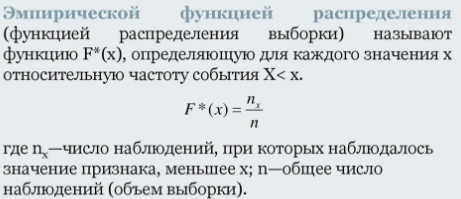

In [284]:
import matplotlib.pyplot as plt

In [272]:
in_degrees = dict(G1.in_degree())
out_degrees = dict(G1.out_degree())

In [273]:
in_unique, in_counts = np.unique(list(in_degrees.values()), return_counts=True)
out_unique, out_counts = np.unique(list(out_degrees.values()), return_counts=True)


In [274]:
sum(in_counts)==len(in_degrees)

True

In [275]:
in_unique

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       18, 20, 21, 23, 24, 26, 31, 34, 46, 47, 65])

In [276]:
in_counts

array([136, 157,  91,  69,  36,  25,  20,  20,  10,   8,   7,   4,   8,
         2,   4,   2,   3,   5,   2,   2,   1,   1,   2,   1,   1,   1,
         1,   1])

In [277]:
np.cumsum(in_counts)

array([136, 293, 384, 453, 489, 514, 534, 554, 564, 572, 579, 583, 591,
       593, 597, 599, 602, 607, 609, 611, 612, 613, 615, 616, 617, 618,
       619, 620])

In [278]:
in_cdf = np.cumsum(in_counts) / len(in_degrees)
out_cdf = np.cumsum(out_counts) / len(out_degrees)

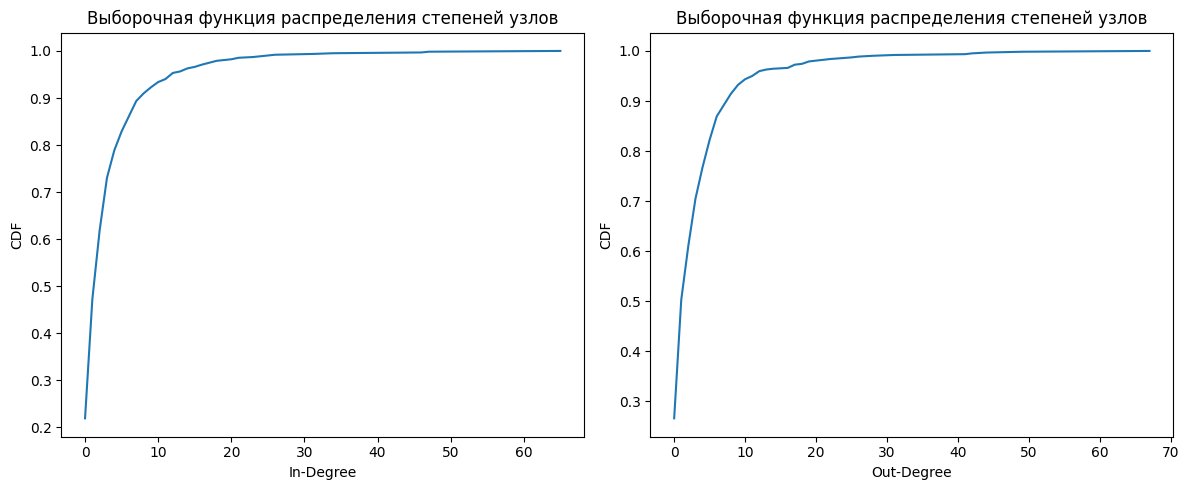

In [283]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(in_unique, in_cdf)
axes[0].set_title('Выборочная функция распределения степеней узлов')
axes[0].set_xlabel('In-Degree')
axes[0].set_ylabel('CDF')


axes[1].plot(out_unique, out_cdf)
axes[1].set_title('Выборочная функция распределения степеней узлов')
axes[1].set_xlabel('Out-Degree')
axes[1].set_ylabel('CDF')

plt.tight_layout()
plt.show()


<p class="task" id="5"></p>

5\. Визуализируйте закон распределения степеней узлов в обычной и логарифимических (по 1й и по 2м осям) системах координат для неориентированного графа. Расположите графики в виде сетки 2х2. Добавьте графикам названия, а осям - подписи.

- [ ] Проверено на семинаре

In [285]:
degrees = dict(G.degree())

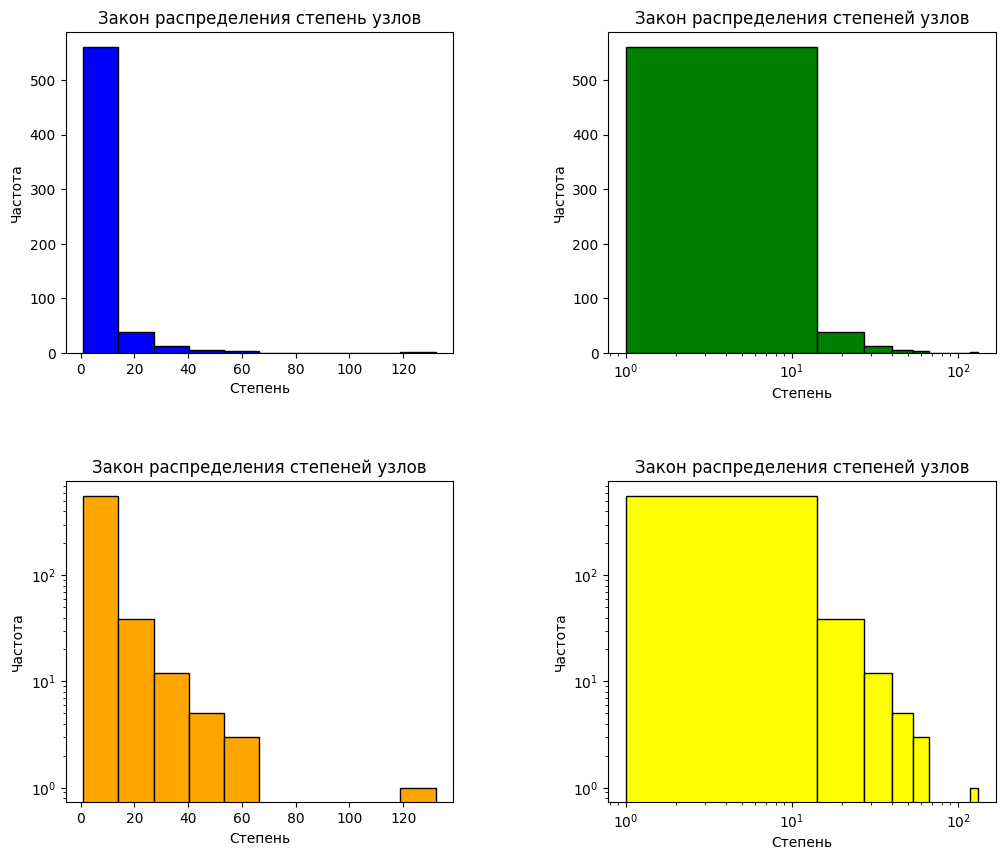

In [286]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# обычная ск
axes[0, 0].hist(degrees.values(), bins=10, color='blue', edgecolor='black')
axes[0, 0].set_title('Закон распределения степень узлов')
axes[0, 0].set_xlabel('Степень')
axes[0, 0].set_ylabel('Частота')

# х - лог
axes[0, 1].hist(degrees.values(), bins=10, color='green', edgecolor='black')
axes[0, 1].set_title('Закон распределения степеней узлов')
axes[0, 1].set_xlabel('Степень')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_xscale('log')

# у - лог
axes[1, 0].hist(degrees.values(), bins=10, color='orange', edgecolor='black', log=True)
axes[1, 0].set_title('Закон распределения степеней узлов')
axes[1, 0].set_xlabel('Степень')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_yscale('log')

# лог - лог
axes[1, 1].hist(degrees.values(), bins=10, color='yellow', edgecolor='black', log=True)
axes[1, 1].set_title('Закон распределения степеней узлов')
axes[1, 1].set_xlabel('Степень')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')

plt.show()


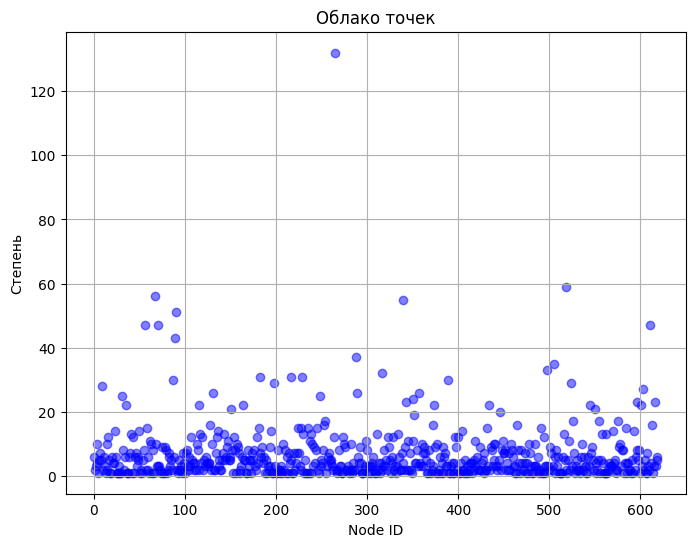

In [287]:
plt.figure(figsize=(8, 6))
plt.scatter(degrees.keys(), degrees.values(), color='blue', alpha=0.5)
plt.title('Облако точек')
plt.xlabel('Node ID')
plt.ylabel('Степень')
plt.grid(True)
plt.show()
